# Chapter Two | Statistical Learning
__Throughout this book, I will highlite the notes on the book itself so they will not be written here. Here I will onlydo the applied exercises for the conceptual ones are solved on paper, and the question that I get wrong in the first try are highlited in order to get back to them once I finish the whole book as a revision.__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Question 8: College Dataset

In [2]:
# a) Load the data into a dataframe
college = pd.read_csv('../Datasets/ISL_data/College.csv')

In [3]:
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
# b) Index the dataframe so that college names are the index:
college.rename(columns={college.columns[0]: 'College'}, inplace=True)
college.set_index('College', inplace=True)

In [5]:
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
# c) i. Numerical summary of the college data:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [7]:
# ii. produce a scatterplot matrix of the first ten columns or variables of the data
# sns.pairplot(college.iloc[1:11])        # Uncomment, commented because it takes too much time.

<AxesSubplot:xlabel='Private', ylabel='Outstate'>

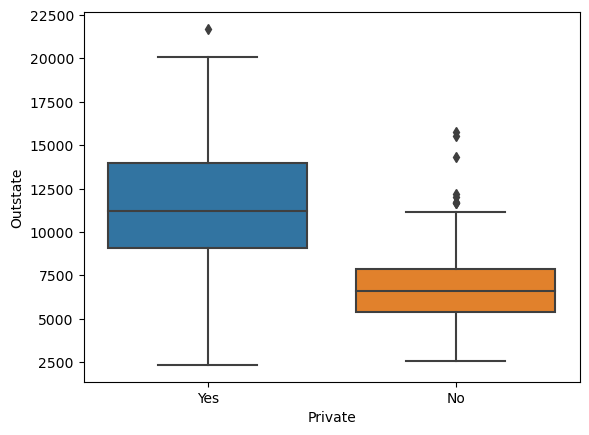

In [8]:
# iii. Produce side-by-side boxplots of Outstate versus Private.
sns.boxplot(x='Private', y='Outstate', data=college)

In [10]:
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [13]:
# iv. Create the new column:
college['Elite'] = college.Top10perc > 50

In [15]:
# How many elites is there?
len(college[college.Elite == True])

78

<AxesSubplot:xlabel='Elite', ylabel='Outstate'>

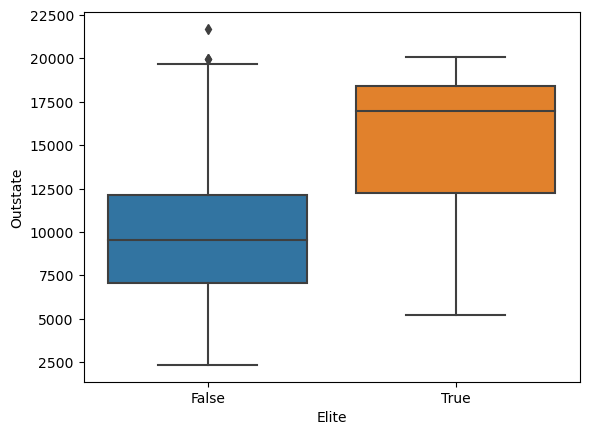

In [16]:
# produce side-by-side boxplots of Outstate versus Elite.
sns.boxplot(x = 'Elite', y='Outstate', data=college)

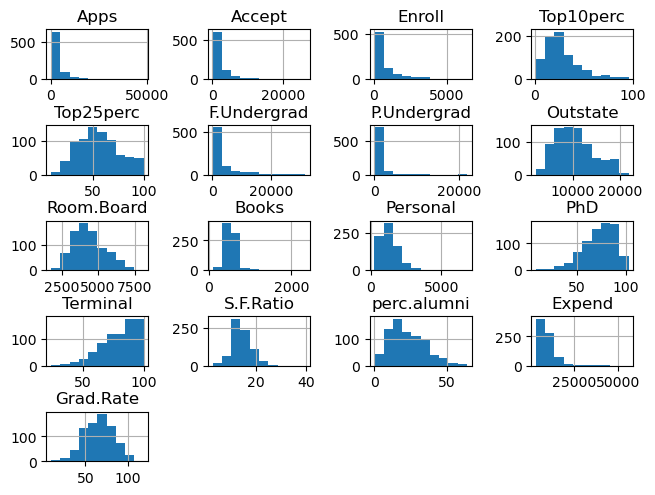

In [26]:
# PLot a histogram for the data
college.hist();
plt.tight_layout(pad=0.15)

## Question 9: Auto Dataset

In [40]:
auto = pd.read_csv('../Datasets/ISL_data/Auto.csv')

In [41]:
auto[30:40]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
30,28.0,4,140.0,90,2264,15.5,71,1,chevrolet vega 2300
31,25.0,4,113.0,95,2228,14.0,71,3,toyota corona
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
33,19.0,6,232.0,100,2634,13.0,71,1,amc gremlin
34,16.0,6,225.0,105,3439,15.5,71,1,plymouth satellite custom
35,17.0,6,250.0,100,3329,15.5,71,1,chevrolet chevelle malibu
36,19.0,6,250.0,88,3302,15.5,71,1,ford torino 500
37,18.0,6,232.0,100,3288,15.5,71,1,amc matador
38,14.0,8,350.0,165,4209,12.0,71,1,chevrolet impala
39,14.0,8,400.0,175,4464,11.5,71,1,pontiac catalina brougham


In [42]:
auto.replace('?', np.nan, inplace=True)

In [43]:
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [44]:
# replacing the missing values with the mean:
mean = auto.horsepower.astype('float').mean()
auto.horsepower.replace(np.nan, mean, inplace=True)

In [45]:
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

There is no missing values.

### a) Which of the predictors are quantitative, and which are quali-tative?

mpg: quantitative, cylinders: qualitative, displacement: quantitative, horsepower: quantitative, wight: quantitative, acceleration: quantitative, origin: qualitative.

In [48]:
datatypes = {'quant': ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'],
             'qual': ['origin', 'name', 'cylinders']}

auto_quant = auto[datatypes['quant']].astype(np.float_)

In [49]:
# (b) What is the range of each quantitative predictor?
# (c) What is the mean and standard deviation of each quantitative predictor?

pd.DataFrame({'range': auto_quant.max() - auto_quant.min(),
              'mean': auto_quant.mean(),
              'std': auto_quant.std()})

,range,mean,std
mpg,37.6,23.515869,7.825804
displacement,387.0,193.532746,104.379583
horsepower,184.0,104.469388,38.247388
weight,3527.0,2970.261965,847.904119
acceleration,16.8,15.555668,2.749995


In [50]:
# (d) Now remove the 10th through 85th observations. 
# What is the range, mean, and standard deviation of each predictor 
# in the subset of the data that remains?

# drop observations 10 to 85
auto_quant_d = auto_quant.drop(auto_quant.index[10: 85])
# results as dataframe
pd.DataFrame({'range': auto_quant_d.max() - auto_quant_d.min(),
              'mean': auto_quant_d.mean(),
              'std': auto_quant_d.std()})

,range,mean,std
mpg,35.6,24.409317,7.913357
displacement,387.0,187.680124,100.120925
horsepower,184.0,101.276017,35.960718
weight,3348.0,2936.807453,810.987533
acceleration,16.3,15.700621,2.706436


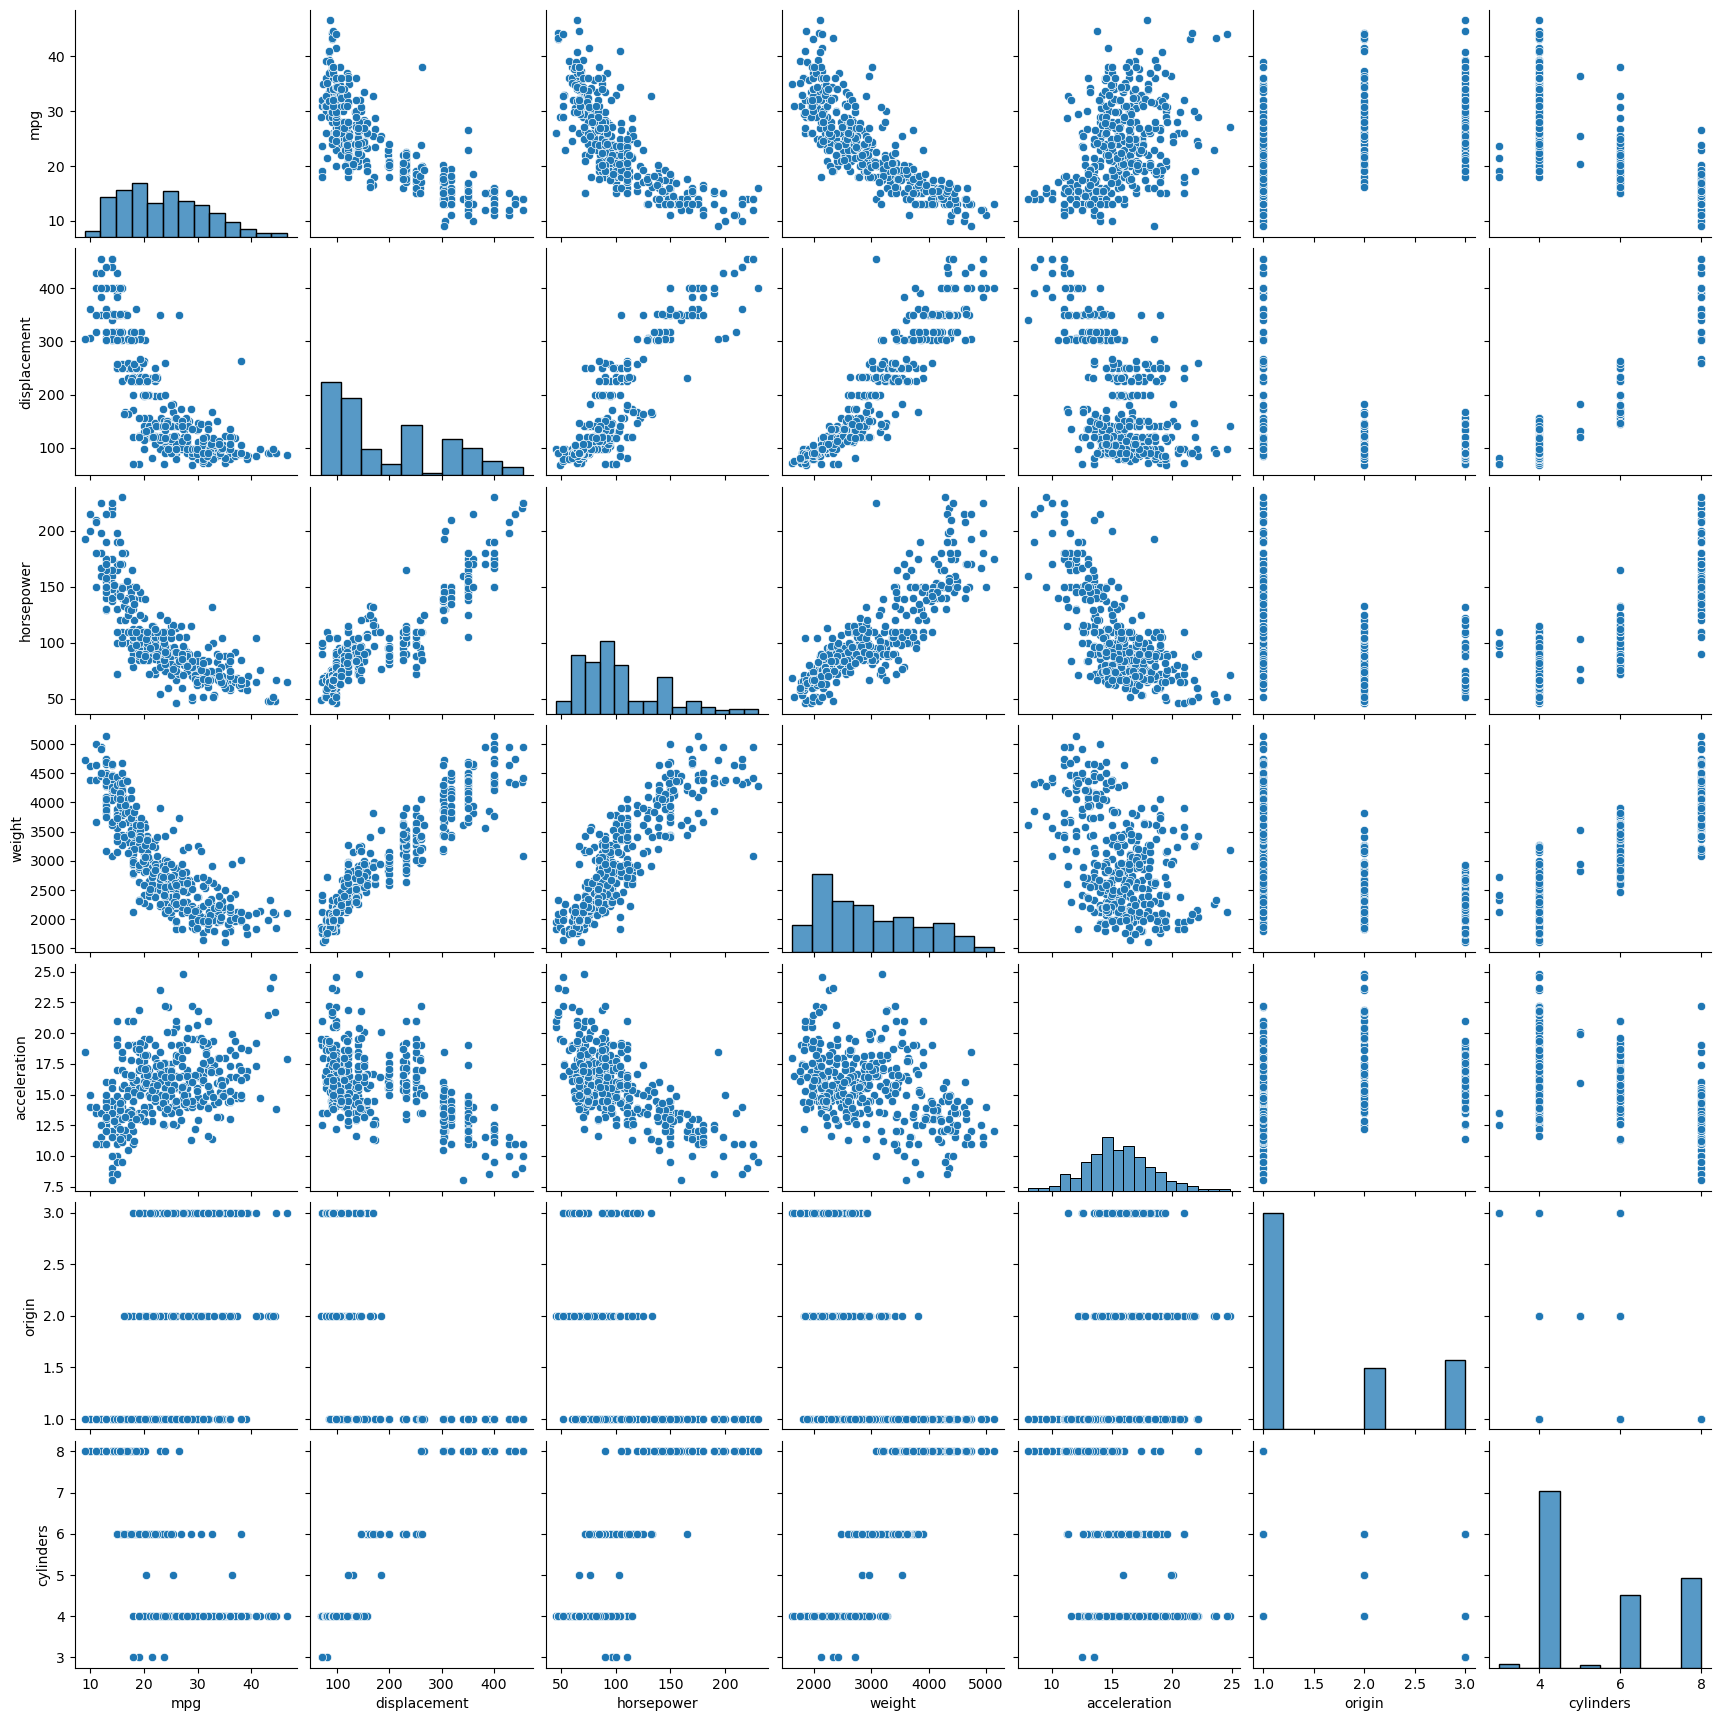

In [51]:
# (e) Using the full data set, investigate the predictors graphically, 
# using scatterplots or other tools of your choice. Create some plots 
# highlighting the relationships among the predictors. Comment on your findings.

# combine numeric quantitive data with original qualitive data
auto_n = pd.concat([auto_quant, auto[datatypes['qual']]], axis=1)
# pairplot grid
sns.pairplot(auto_n);

Comments:

mpg appears to correlate strongly with weight, hordsepower and displacement. These relationships are non-linear and appear to be exponential. The distribution of mpg is skewed
the relationships between displacement, horespower, and weight appear to be linear
cylinder count correlate positively with displacement, horespower, and weight and negatively with mpg
the relationship between acceleration and other features seems weekly correlated. horsepower is perhaps most strongly correlated. acceleration has a normal distribution

In [52]:
# To see how strongly are they correlated, I use the pearson correlation coefficient:
auto.corr()

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000


<AxesSubplot:>

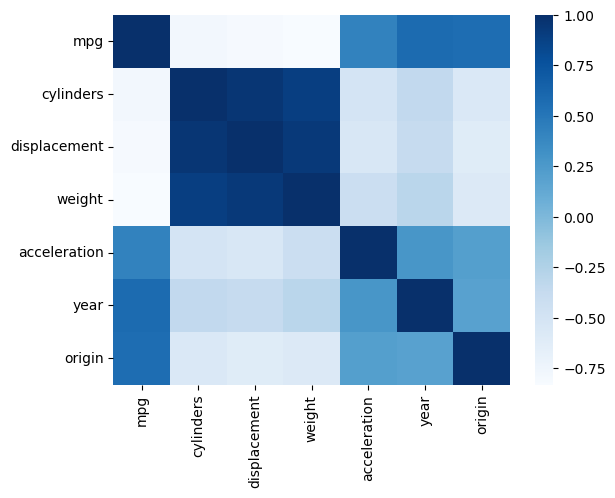

In [54]:
# Plottig a heatmap for it:
sns.heatmap(auto.corr(), cmap='Blues')

(f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? justify your answer.

MPG is highly correlated with cylinders, displacement and weight, and thus, they're good predicators to predict MPG.